In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn import preprocessing

In [2]:
# Read file
data = pd.read_csv('./data-sparse-recov.csv', header=None).to_numpy()

# L2 Norm

In [3]:
A = data[:,:-1]
y = data[:,-1]
print('A:',A.shape)
print('y:',y.shape)
x, residuals, rank, s = np.linalg.lstsq(A, y)
print('x:',x.shape)

A: (100, 200)
y: (100,)
x: (200,)


/var/folders/81/801rlldj66b9mqn09r7s37jr0000gn/T/ipykernel_17814/702069271.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, residuals, rank, s = np.linalg.lstsq(A, y)


# L1 Norm

In [4]:
A = data[:, :-1]
b = data[:,-1]

In [5]:
one = np.ones(200).reshape(200, 1)

In [6]:
zero = np.zeros(200).reshape(200,1)

In [7]:
c = np.concatenate((zero, one), axis=0)

In [8]:
c.shape

(400, 1)

In [9]:
A_ub = np.concatenate((-np.identity(200), -np.identity(200)), axis=1)

In [10]:
A_ub.shape

(200, 400)

In [11]:
A_ub = np.concatenate((A_ub, np.concatenate((np.identity(200), -np.identity(200)), axis=1)), axis=0)

In [12]:
A_ub.shape

(400, 400)

In [13]:
h = np.zeros(400).reshape(400,1)

In [14]:
h.shape

(400, 1)

In [15]:
A_eq = np.concatenate((A, np.zeros((100, 200))), axis=1)

In [16]:
A_eq.shape

(100, 400)

In [17]:
# A_ub @ x <= b_ub
# A_eq @ x == b_eq

res = linprog(c, A_eq=A_eq, b_eq=b, A_ub=A_ub, b_ub=h, bounds=(None, None))

In [18]:
res.x[:200]

array([ 8.73248293e-01, -1.36553762e+00,  4.67825778e-12,  5.15387745e-01,
        4.33231229e-12, -4.61143130e-01, -4.51905180e-11,  7.59110859e-02,
       -2.04584877e-01, -7.34523553e-13,  2.49894684e+00,  1.63543729e+00,
        1.80522264e-12,  1.09336090e+00, -1.76447745e-11, -1.54695245e+00,
       -6.12998541e-12,  2.07903652e-01,  1.08289724e+00, -1.61781699e-12,
        1.32593200e-01, -1.19477761e-11,  5.70650074e-02,  7.77986958e-02,
        4.75964043e-01, -1.86006766e-12,  2.07389661e-12,  1.47161157e+00,
       -3.58379992e-13, -1.39799283e-12,  2.28861374e-12, -3.42059714e-12,
       -1.01030295e-13, -2.90230617e-09, -1.17150734e-12, -3.55271368e-14,
        1.55475632e-12, -1.04296571e-11,  3.70949697e-01, -2.04052331e-11,
        1.84274818e-12,  5.91941982e-01,  1.77258208e-12,  1.52730414e+00,
        1.08149932e+00, -7.11125690e-01,  1.07625020e-12,  1.15754792e-01,
        2.88413737e-12,  1.56665791e-11, -8.87728348e-02,  3.47208274e-01,
        2.25908181e-12, -

In [19]:
res.x

array([ 8.73248293e-01, -1.36553762e+00,  4.67825778e-12,  5.15387745e-01,
        4.33231229e-12, -4.61143130e-01, -4.51905180e-11,  7.59110859e-02,
       -2.04584877e-01, -7.34523553e-13,  2.49894684e+00,  1.63543729e+00,
        1.80522264e-12,  1.09336090e+00, -1.76447745e-11, -1.54695245e+00,
       -6.12998541e-12,  2.07903652e-01,  1.08289724e+00, -1.61781699e-12,
        1.32593200e-01, -1.19477761e-11,  5.70650074e-02,  7.77986958e-02,
        4.75964043e-01, -1.86006766e-12,  2.07389661e-12,  1.47161157e+00,
       -3.58379992e-13, -1.39799283e-12,  2.28861374e-12, -3.42059714e-12,
       -1.01030295e-13, -2.90230617e-09, -1.17150734e-12, -3.55271368e-14,
        1.55475632e-12, -1.04296571e-11,  3.70949697e-01, -2.04052331e-11,
        1.84274818e-12,  5.91941982e-01,  1.77258208e-12,  1.52730414e+00,
        1.08149932e+00, -7.11125690e-01,  1.07625020e-12,  1.15754792e-01,
        2.88413737e-12,  1.56665791e-11, -8.87728348e-02,  3.47208274e-01,
        2.25908181e-12, -

# Ploat Graph

In [20]:
def NormalizeData(data):
    norm = np.linalg.norm(data)
    return data/norm

In [21]:
x_l2 = NormalizeData(x)
x_l1 = NormalizeData(res.x[:200])

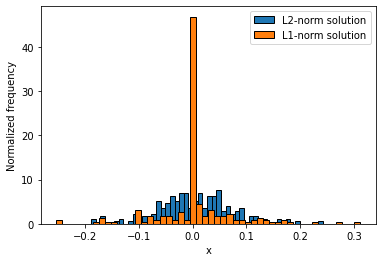

In [22]:
bins = 50
plt.hist(x_l2, density=True, bins=bins, edgecolor="black", label='L2-norm solution')
plt.hist(x_l1, density=True, bins=bins, edgecolor="black", label='L1-norm solution')

plt.xlabel("x")
plt.ylabel("Normalized frequency")
plt.legend(loc='upper right')

plt.show()

# Conclusion

เวลา minimize ปัญหา l_1 norm ในกรณีแรกที่เป็นไปได้ จะมี optimum value ที่ค่า x บาง x บน hyperplane ไปชนที่ขอบของ l_1 norm ทำให้มีบาง entry ของ x จะได้ค่าเป็น 0 เราเรียกกรณีนี้ว่า sparse solution
ในกรณีที่สองที่ hyperplane ไปแนบกับ surface ของ l_1 norm พอดีทำให้ทุกๆค่าของ x ไม่เป็น 0 เราเรียกกรณีนี้ว่า dense solution
จากปัญหาที่เราทำ การที่เราใช้ l_1 norm ในการแก้ปัญหา solution ที่ได้ ค่า x บางตัวจะมีค่าเป็น 0 ประมาณ 50% ของทั้งหมด กรณีนี้เราเรียกว่าเป็น sparse solution
กลับกันถ้าเราใช้ l_2 norm ในการแก้ปัญหา จะสังเกตได้ว่าค่า x จะมีการเฉลี่ยกันไป ส่วนมากจะไม่เป็น 0 กรณีนี้เป็น dense solution
สุดท้ายเราสามารถสังเกตจากกราฟได้ว่า solution ของ l_2 norm ค่า x จะเป็นแบบกระจายตัว